# SVM  - This is a Support Vector Machine example using SciKit Learn

    Copyright (C) 2020 Adrian Bevan, Queen Mary University of London

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.
    
----------------------
## Support Vector Machine

SVMs are an algorithm that can work well with small amounts of training data. There are two types of SVM, the hard margin and soft marging variants.  This example is using the latter as we have distributions of example that overlap.  The canoncial reference for SVMs is the book "An Introduction to Support Vector Machines and Other Kernel-based Learning Methods" by Nello Cristianini and  John Shawe-Taylor.  The method works by implicitly mapping the input feature space into a potentially infinite dimensional dual space in order to compute a decision boundary separation between classes of example. This classifier is described in more detail on the sklearn website: [SupportVectorMachine](https://scikit-learn.org/stable/modules/svm.html).



This notebook will use the iris data used in the paper by R. A. Fisher "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936).  

The data are split into test and train samples, and the classifier is learned on the train sample. The residual test sample is then used to evaluate the performance of the classifier learned.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import svm # use libsvm's SVM
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.01

# Load data
print("\033[1mLoad the sklearn Iris data\033[0m\n")
iris = load_iris()

# split the data into test and train samples. The train sample will be used to learn
# the model, and the test sample will be used to evaluate module performance.
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Iris data have been split into test and train samples")
print("\tN(train) = ", len(X_train))
print("\tN(test)  = ", len(X_test))


#
# Fit a linear SVM as a classifier for the Iris data
#
print("\033[1mFit the decision tree\033[0m")
SVM_clf = svm.SVC(gamma="auto") # use the classifier
SVM_clf.fit(X_train, y_train)

print("... now compute the decision tree score")
train_score = SVM_clf.score(X_train, y_train)
test_score  = SVM_clf.score(X_test, y_test)

print("\nDecision Tree Classifier Score is:")
print("\tTrain Score = ", train_score, " (This measure of performance is biased)")
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(X_test)))


Load the sklearn Iris data

Iris data have been split into test and train samples
	N(train) =  112
	N(test)  =  38
Fit the decision tree
... now compute the decision tree score

Decision Tree Classifier Score is:
	Train Score =  0.9821428571428571  (This measure of performance is biased)
	Test Score  = 0.9737
	Number of mis-classified test data = 1.0


------------------------
## Evaluating the model

Having learned the classification model we can now apply this to the test data. This is done by using the model to predict an output given the input data examples. Those predicted classification labels can be compared against the true values on an individual basis and via a confusion matrix (a $2\times 2$ matrix of ground truth vs model predictions, where the off-diagonal terms are mis-clasified examples).


Study the test data

confusion matrix (test) = 
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


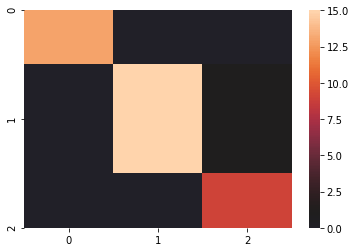


Check ground truth against predictions for the test sample
Truth	Prediction	Correct Prediction
2	2	True
1	1	True
0	0	True
2	2	True
0	0	True
2	2	True
0	0	True
1	1	True
1	1	True
1	1	True
2	2	True
1	1	True
1	1	True
1	1	True
1	1	True
0	0	True
1	1	True
1	1	True
0	0	True
0	0	True
2	2	True
1	1	True
0	0	True
0	0	True
2	2	True
0	0	True
0	0	True
1	1	True
1	1	True
0	0	True
2	2	True
1	1	True
0	0	True
2	2	True
2	2	True
1	1	True
0	0	True
1	2	False

Run Cross Validation On the Sample
cross validation scores =  [1.         0.95652174 1.         0.90909091 0.95238095]
	mean = 0.9636


In [4]:
#
# Use the test data to compute a confusion matrix and to compare predictions against
# the ground truth labels.
#
print("\n\033[1mStudy the test data\033[0m")
predictions = SVM_clf.predict(X_test)
SVMcm = confusion_matrix(y_test, predictions)
print("\nconfusion matrix (test) = \n", SVMcm)
sns.heatmap(SVMcm, center=True)
plt.show()

#
# Compare the ground truth and model prediction
#
print("\n\033[1mCheck ground truth against predictions for the test sample\033[0m")
print("Truth\tPrediction\tCorrect Prediction")
for i in range(len(predictions)):
    Match = False
    if predictions[i] == y_test[i]:
        Match = True
    print("{:}\t{:}\t{:}".format(y_test[i], predictions[i], Match))

#
# Try cross validation with this sample - 5 splits of the data.  For this 
# look at the accuracy scores for each split in order to determine the
# mean performance.
#
print("\n\033[1mRun Cross Validation On the Sample\033[0m")
scores = cross_val_score(SVM_clf, X_train, y_train, cv=5)
print("cross validation scores = ", scores)
print("\tmean = {:5.4f}".format(scores.mean()))
